# Assignment 3
### CSC 478
#### Kristen Groom
#### 5/11/18

#### 1) Linear Regression [Dataset: communities.zip]
For this problem you will experiment with linear regression models to make predictions with numerical data. You will also explore more systematic methods for feature selection and for optimizing model parameters (model selection). The data set you will use is a subset of the "Communities and Crime" data set that combines information from the 1990 census data as well as FBI crime data from 1995. Please read the full description of the data, including the description and statistics on different variables. The target attribute for regression purposes is "ViolentCrimesPerPop". The two identifier attributes "state" and "community name" should be excluded for the regression task.

Your tasks in this problem are the following [Note: for these tasks you will use the available linear-models from scikit-learn as well as the implementations of the relevant approaches from the Ch. 8 of MLA] 

#### a) Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression.

In [1]:
# import libraries needed for our Linear Regression tasks
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pylab as pl
import pandas as pd

In [2]:
# first task is to read in the data:
# reading in the training data as a pandas DataFrame:
communities_matrix = pd.read_csv("communities/communities.csv", na_values=["?"])

In [3]:
communities_matrix.head(10)

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
5,6,SouthPasadenacity,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,...,0.0,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10,0.14
6,44,Lincolntown,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,...,0.0,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06,0.03
7,6,Selmacity,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,...,0.0,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0.00,0.55
8,21,Hendersoncity,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,...,0.0,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04,0.53
9,29,Claytoncity,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,...,0.0,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11,0.15


In [4]:
communities_matrix.shape

(1994, 100)

In [5]:
# I can remove state and communityname from our data b/c we will not be using this information
communities_matrix.drop(['state', 'communityname'], axis=1, inplace=True)

In [6]:
communities_matrix.head(10)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.0,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10,0.14
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,...,0.0,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06,0.03
7,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,...,0.0,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0.00,0.55
8,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,...,0.0,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04,0.53
9,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,0.39,...,0.0,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11,0.15


In [7]:
# holding column names for the visualization of regression coefficients that I'll complete in steps below
# after finding the weights
feature_names = list(communities_matrix.columns.values) # gives the column names or feature names

#### Basic Statistics of dataset

In [8]:
communities_matrix.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
population,1994.0,0.057593,0.126906,0.0,0.0100,0.020,0.0500,1.0
householdsize,1994.0,0.463395,0.163717,0.0,0.3500,0.440,0.5400,1.0
racepctblack,1994.0,0.179629,0.253442,0.0,0.0200,0.060,0.2300,1.0
racePctWhite,1994.0,0.753716,0.244039,0.0,0.6300,0.850,0.9400,1.0
racePctAsian,1994.0,0.153681,0.208877,0.0,0.0400,0.070,0.1700,1.0
racePctHisp,1994.0,0.144022,0.232492,0.0,0.0100,0.040,0.1600,1.0
agePct12t21,1994.0,0.424218,0.155196,0.0,0.3400,0.400,0.4700,1.0
agePct12t29,1994.0,0.493867,0.143564,0.0,0.4100,0.480,0.5400,1.0
agePct16t24,1994.0,0.336264,0.166505,0.0,0.2500,0.290,0.3600,1.0
agePct65up,1994.0,0.423164,0.179185,0.0,0.3000,0.420,0.5300,1.0


Looking at the data above, at first glance, I do not see whether there are no null values because the counts are equal to the number of vectors in the data. Although I will want to check to make sure:

In [9]:
nans_rows = communities_matrix[communities_matrix.isnull().any(axis=1)]

In [10]:
nans_rows

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
130,0.02,0.38,0.98,0.22,0.01,0.01,0.44,0.4,0.27,0.58,...,0.0,0.01,0.84,0.7,0.83,0.77,0.04,0.12,0.05,0.23


In [11]:
# ok so I see that there is 1 row with a null value so I will drop this row

In [12]:
communities_matrix.dropna(axis=0, inplace=True)

In [13]:
print communities_matrix[communities_matrix.isnull().any(axis=1)]

Empty DataFrame
Columns: [population, householdsize, racepctblack, racePctWhite, racePctAsian, racePctHisp, agePct12t21, agePct12t29, agePct16t24, agePct65up, numbUrban, pctUrban, medIncome, pctWWage, pctWFarmSelf, pctWInvInc, pctWSocSec, pctWPubAsst, pctWRetire, medFamInc, perCapInc, whitePerCap, blackPerCap, indianPerCap, AsianPerCap, OtherPerCap, HispPerCap, NumUnderPov, PctPopUnderPov, PctLess9thGrade, PctNotHSGrad, PctBSorMore, PctUnemployed, PctEmploy, PctEmplManu, PctEmplProfServ, MalePctDivorce, MalePctNevMarr, FemalePctDiv, TotalPctDiv, PersPerFam, PctFam2Par, PctKids2Par, PctYoungKids2Par, PctTeen2Par, PctWorkMomYoungKids, PctWorkMom, NumIlleg, PctIlleg, NumImmig, PctImmigRecent, PctImmigRec5, PctImmigRec8, PctImmigRec10, PctRecentImmig, PctRecImmig5, PctRecImmig8, PctRecImmig10, PctSpeakEnglOnly, PctNotSpeakEnglWell, PctLargHouseFam, PctLargHouseOccup, PersPerOccupHous, PersPerOwnOccHous, PersPerRentOccHous, PctPersOwnOccup, PctPersDenseHous, PctHousLess3BR, MedNumBR, HousVa

In [14]:
communities_matrix.head(10)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.0,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10,0.14
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,...,0.0,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06,0.03
7,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,...,0.0,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0.00,0.55
8,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,...,0.0,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04,0.53
9,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,0.39,...,0.0,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11,0.15


In [15]:
# I can also look at pearson correlation:
communities_matrix.corr()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
population,1.000000,-0.046228,0.232235,-0.301540,0.181526,0.156149,0.006383,0.130264,0.075541,-0.101897,...,0.651786,0.172637,-0.125008,-0.123584,0.001761,-0.089559,0.713643,0.231838,0.270305,0.367160
householdsize,-0.046228,1.000000,-0.066473,-0.236766,0.201858,0.468581,0.520523,0.367235,0.295154,-0.612600,...,-0.043072,0.310962,-0.048983,-0.057625,-0.102883,-0.003125,-0.015138,-0.004214,-0.051637,-0.034934
racepctblack,0.232235,-0.066473,1.000000,-0.793863,-0.105925,-0.065837,0.122485,0.154916,0.135043,0.051686,...,0.167916,-0.096966,0.091961,-0.047216,0.054900,-0.003852,0.150503,0.096183,0.148176,0.632904
racePctWhite,-0.301540,-0.236766,-0.793863,1.000000,-0.271379,-0.445371,-0.194137,-0.267920,-0.184470,0.137636,...,-0.239464,-0.374424,0.115216,0.166519,-0.018589,0.033114,-0.131802,-0.338501,-0.216444,-0.685631
racePctAsian,0.181526,0.201858,-0.105925,-0.271379,1.000000,0.266598,-0.024988,0.100524,0.052632,-0.271802,...,0.169384,0.657352,-0.405063,-0.189265,-0.194646,-0.198114,-0.001164,0.389828,0.296805,0.037614
racePctHisp,0.156149,0.468581,-0.065837,-0.445371,0.266598,1.000000,0.145783,0.205720,0.086239,-0.227504,...,0.157672,0.684126,-0.261949,-0.165463,0.014793,0.000375,0.011568,0.370002,0.078236,0.293065
agePct12t21,0.006383,0.520523,0.122485,-0.194137,-0.024988,0.145783,1.000000,0.822548,0.894606,-0.411083,...,-0.024934,-0.068506,0.080249,-0.357267,-0.361372,-0.150600,0.025748,-0.095728,-0.173265,0.060479
agePct12t29,0.130264,0.367235,0.154916,-0.267920,0.100524,0.205720,0.822548,1.000000,0.933727,-0.520506,...,0.068469,0.077395,-0.047189,-0.558953,-0.505845,-0.317513,0.062408,0.119565,-0.023671,0.153362
agePct16t24,0.075541,0.295154,0.135043,-0.184470,0.052632,0.086239,0.894606,0.933727,1.000000,-0.322992,...,0.036995,0.005418,-0.013581,-0.462830,-0.479017,-0.274456,0.031587,0.045874,-0.040520,0.099344
agePct65up,-0.101897,-0.612600,0.051686,0.137636,-0.271802,-0.227504,-0.411083,-0.520506,-0.322992,1.000000,...,-0.036585,-0.139621,0.149343,0.394105,0.372693,0.255469,-0.124169,0.015682,0.007002,0.067199


The correlation matrix is huge so I would have to look at individual variables to see how or if they are correlated, I can see how feature selection will be beneficial as I consider the models I choose to use for regression analysis based on how many variables we are working with

In [16]:
# now I will convert the dataframe into a np.array to use with our regression algorithm

In [17]:
data = np.asarray(communities_matrix)

In [18]:
print data

[[ 0.19  0.33  0.02 ...,  0.26  0.2   0.2 ]
 [ 0.    0.16  0.12 ...,  0.12  0.45  0.67]
 [ 0.    0.42  0.49 ...,  0.21  0.02  0.43]
 ..., 
 [ 0.16  0.37  0.25 ...,  0.32  0.18  0.23]
 [ 0.08  0.51  0.06 ...,  0.38  0.33  0.19]
 [ 0.2   0.78  0.14 ...,  0.3   0.05  0.48]]


In [20]:
data.shape # see that the nan row was removed

(1993, 98)

In [21]:
# Getting the target variable data into its own array
target = data[:,-1]

In [22]:
print target

[ 0.2   0.67  0.43 ...,  0.23  0.19  0.48]


In [23]:
# remove target variable from the training matrix
train_data = data[:, :97]

In [24]:
print train_data

[[ 0.19  0.33  0.02 ...,  0.12  0.26  0.2 ]
 [ 0.    0.16  0.12 ...,  0.02  0.12  0.45]
 [ 0.    0.42  0.49 ...,  0.01  0.21  0.02]
 ..., 
 [ 0.16  0.37  0.25 ...,  0.08  0.32  0.18]
 [ 0.08  0.51  0.06 ...,  0.03  0.38  0.33]
 [ 0.2   0.78  0.14 ...,  0.11  0.3   0.05]]


#### b) Perform standard linear regression on data using the implementation for Ch. 8 of MLA. Compute the RMSE value on the full training data. Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights). Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.cross_validation).

In [26]:
# import pdb

# This is the code from our Professor's notebook with my own notes added for better understanding
# standard linear regression:
# this function computes the best line fit by returning the regression weights as a vector of w values
# This basically uses closed form solution for least squares method
# passes xArr, yArr - our x,y - these are np arrays
# inside the function it turns it into the matrix
# internally is just a 2-d array
# .mat has certain functions that are not available with np.arrays

def standRegres(xArr,yArr):
    
#     pdb.set_trace() # python debugger that I'm using to find my error
    
    xMat = np.mat(xArr); yMat = np.mat(yArr).T # turns np.arrays into matrixes
    xTx = xMat.T*xMat # if we had np.arrays, this would just be element-wise multiplication
    # vs matrixes - wherein this is matrix multiplication: multiplying x * x.T(in slides)
    
    # now we need to find the inverse:
    # but if determinant of matrix is 0, then it cannot compute
    # so we print an error
    if np.linalg.det(xTx) == 0.0: # linear algebra library that gives us the determinate
        print "This matrix is singular, cannot do inverse"
        return
    
    # otherwise, compute inverse and then do matrix multiplication 
    # close form solution for standard linear regression
    ws = xTx.I * (xMat.T*yMat)
    return ws # returns the vector of w values

# the way you can use this is by calling this function on x,y

In [27]:
# In order to do multiple regression we need to add a column of 1s for x0 - see slide 7 of regression slides
# to do this we are concatenating a one to each row of the array at the end
# v represents a vector in our data
# so then we will get all the data with the 1 at the end - see below
x = np.array([np.concatenate((v,[1.0])) for v in train_data]) # x is matrix
y = target # y is response var - we are keeping consistent with algorithms by using x,y 

In [28]:
# looking at first 10 rows of our matrix x
# and we can see that there is a 1 at the end of each row
print x[:10]

[[ 0.19  0.33  0.02  0.9   0.12  0.17  0.34  0.47  0.29  0.32  0.2   1.
   0.37  0.72  0.34  0.6   0.29  0.15  0.43  0.39  0.4   0.39  0.32  0.27
   0.27  0.36  0.41  0.08  0.19  0.1   0.18  0.48  0.27  0.68  0.23  0.41
   0.68  0.4   0.75  0.75  0.35  0.55  0.59  0.61  0.56  0.74  0.76  0.04
   0.14  0.03  0.24  0.27  0.37  0.39  0.07  0.07  0.08  0.08  0.89  0.06
   0.14  0.13  0.33  0.39  0.28  0.55  0.09  0.51  0.5   0.21  0.71  0.52
   0.05  0.26  0.65  0.14  0.06  0.22  0.19  0.18  0.36  0.35  0.38  0.34
   0.38  0.46  0.25  0.04  0.    0.12  0.42  0.5   0.51  0.64  0.12  0.26
   0.2   1.  ]
 [ 0.    0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  0.02  1.
   0.31  0.72  0.11  0.45  0.25  0.29  0.39  0.29  0.37  0.38  0.33  0.16
   0.3   0.22  0.35  0.01  0.24  0.14  0.24  0.3   0.27  0.73  0.57  0.15
   1.    0.63  0.91  1.    0.29  0.43  0.47  0.6   0.39  0.46  0.53  0.
   0.24  0.01  0.52  0.62  0.64  0.63  0.25  0.27  0.25  0.23  0.84  0.1
   0.16  0.1   0.17  0.29  0.1

In [29]:
# View first ten elements of the target data
print y[:10]

[ 0.2   0.67  0.43  0.12  0.03  0.14  0.03  0.55  0.53  0.15]


In [30]:
# I'm really unsure if I need to do this yet

# split data into training and test

from sklearn.cross_validation import train_test_split
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=33)
# get randomized 80/20 split
# all cross-val doing - doing on training
# run on test data as final step just to see accuracy

In [31]:
# here we are getting our vector of regression weights by passing in x and y
w = standRegres(x,y) 

In [32]:
print w # this is our 1-d vector of regression weights
# w's are weights according to features
# can be positive or negative

[[ -1.23274125e-01]
 [  6.75179555e-03]
 [  2.30380105e-01]
 [  1.19090859e-02]
 [  2.23184672e-03]
 [  1.03141096e-01]
 [  1.74785968e-01]
 [ -2.95684337e-01]
 [ -1.50353957e-01]
 [  1.06324388e-01]
 [  6.27284543e-02]
 [  4.18333159e-02]
 [ -1.27178914e-01]
 [ -3.02481695e-01]
 [  3.17482567e-02]
 [ -1.82704491e-01]
 [ -6.22150671e-02]
 [  2.04305861e-02]
 [ -7.86345616e-02]
 [  1.47145551e-01]
 [  9.37761711e-03]
 [ -1.40064473e-01]
 [ -2.19732896e-02]
 [ -3.10570337e-02]
 [  1.70178754e-02]
 [  2.84278945e-02]
 [  3.76389589e-02]
 [  1.52989956e-01]
 [ -1.95656878e-01]
 [ -1.10977370e-01]
 [  6.88207406e-02]
 [  9.40507991e-02]
 [  3.55343798e-02]
 [  2.87584105e-01]
 [ -1.93113730e-02]
 [ -1.39061270e-02]
 [  3.62876056e-01]
 [  2.59733194e-01]
 [ -3.53559980e-02]
 [ -2.76849870e-01]
 [ -6.68238876e-02]
 [  8.06394517e-02]
 [ -3.33432611e-01]
 [ -2.78871594e-02]
 [ -9.79507415e-03]
 [  6.57579495e-02]
 [ -1.91489610e-01]
 [ -2.34402322e-01]
 [  1.45490323e-01]
 [ -9.28827172e-02]


In [33]:
# Now that I have the weights, I can find the predicted value for y using following code
# which I will then plot:
# using code from the book pg. 158

xMat = np.mat(x)
yMat = np.mat(y)

In [34]:
# predicted y's
yHat = xMat*w

In [35]:
# Here are our predicted values
print yHat[0:10]

[[ 0.32888552]
 [ 0.25656182]
 [ 0.01018449]
 [-0.04678201]
 [ 0.27344635]
 [ 0.09930385]
 [ 0.34001867]
 [ 0.06481784]
 [ 0.21854776]
 [ 0.16179036]]


In [36]:
# Here are our actual values
print yMat.T[0:10]

[[ 0.31]
 [ 0.05]
 [ 0.22]
 [ 0.1 ]
 [ 0.31]
 [ 0.19]
 [ 0.52]
 [ 0.08]
 [ 0.22]
 [ 0.71]]


In [37]:
# This is where I got stuck for hours, ugh!
# The book gives us output in column-matrix format
# if we want the same format as sklearn,
# a 1-d array,
# we need to do the following code:
p = yHat.A.ravel() 
# yHat.A - gives you the array portion, then the 
#.ravel() flattens a 2-d array into 1-d array b/c we see above that we have a 2-d matrix
# but doesn't change it permanently so putting into variable p for prediction

In [38]:
print p

[ 0.32888552  0.25656182  0.01018449 ...,  0.35402712  0.28346037
  0.03441544]


In [39]:
# We can find the error which is based on difference between actual response vars, and predicted response vars
# diff between p and y values
# Compute RMSE using steps from class notes

In [40]:
err = abs(p - y)

In [41]:
# Let's see the error on the first 10 predictions
print err[:10]

[ 0.01888552  0.20656182  0.20981551  0.14678201  0.03655365  0.09069615
  0.17998133  0.01518216  0.00145224  0.54820964]


In [42]:
# We need to compute the sum of squared errors:
# multiply error values with themselves - same as squaring error
# and add them up - is the formula for finding the dot product between the err and err
# Formula:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

In [43]:
print total_error

25.9234289929


In [44]:
# Now we have all the information that we need to comput RMSE

# Compute RMSE - root mean square error formula:
# remember this is the rmse on the training data
rmse_train = np.sqrt(total_error/len(p)) # square root of sum of squared errors divided by N or total number of values
print rmse_train

0.12752697698


In [45]:
import matplotlib.pyplot as plt

In [46]:
# we need to sort our y's
xCopy = xMat.copy()

In [47]:
xCopy.sort()

In [48]:
xCopy.shape

(1594, 98)

In [49]:
# predicted values but using sort:
yHat = xCopy*w

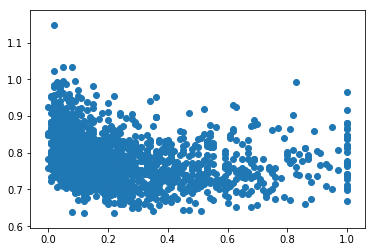

In [50]:
# Plotting the predicted values yHat with y
# using code from book on page 158
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(yMat.T[:,0].flatten().A[0], yHat[:,0].flatten().A[0])
#ax.plot(yMat, yHat) # this is creating a crazy visualization with multiple lines, not sure how to get one line 
plt.show()

In [51]:
type(w)

numpy.matrixlib.defmatrix.matrix

In [52]:
# once again I need to change the 2-d matrix of regression weights
w = w.A.ravel() 

In [53]:
print w[:10]

[-0.12327412  0.0067518   0.2303801   0.01190909  0.00223185  0.1031411
  0.17478597 -0.29568434 -0.15035396  0.10632439]


In [54]:
len(feature_names)

98

In [55]:
feature_names

['population',
 'householdsize',
 'racepctblack',
 'racePctWhite',
 'racePctAsian',
 'racePctHisp',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'numbUrban',
 'pctUrban',
 'medIncome',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'PctEmplManu',
 'PctEmplProfServ',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmigRec10',
 'PctRecentImmig',
 'PctRecImmig5',
 'PctRecImmig8',
 'PctRecImmig10',
 'PctSpeakEnglOnly',
 'PctNotSpeakEnglWell',
 'PctL

(-1, 98)

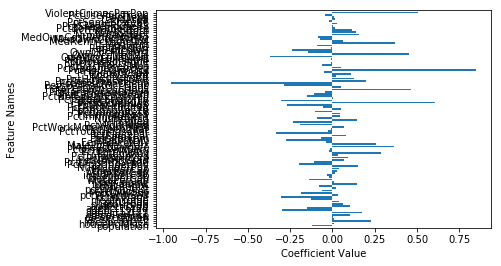

In [56]:
# we can plot the importance of the features with the method 
# we see that NOX have highest negative prediction
# and river, and rm have highest predictive value

%matplotlib inline

n_features = len(feature_names)

pl.barh(range(n_features), w, align='center')
pl.yticks(np.arange(n_features), feature_names)
pl.xlabel("Coefficient Value")
pl.ylabel("Feature Names")
pl.ylim(-1, n_features)



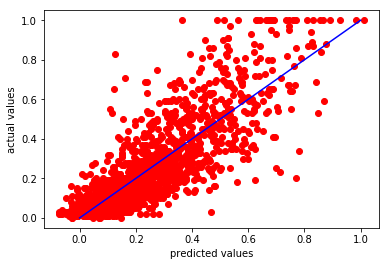

In [57]:
# We can also plot the predicted values against the y values

%matplotlib inline
pl.plot(p, y,'ro') # ro just means dots will show up as red circles
pl.plot([0,1],[0,1], 'b-') # this plots a straight line where b- means the line will be blue
pl.xlabel('predicted values')
pl.ylabel('actual values')
pl.show()

In [58]:
# now perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE 
# (for cross validation, you should use the KFold module from sklearn.cross_validation).

In [59]:
n = 10

kf = KFold(n_splits=n, random_state=None, shuffle=False)

# initialize the error to 0 - then we will add the errors and find the average
# each time we go through the loop we find the RMSE on that particular fold
# build a separate model on each different part of the training data and then compute RMSE each time
xval_err = 0
for train,test in kf.split(x):
    w = standRegres(x[train],y[train]) # calling our linear regression function on x and y - training data
    xMat = np.mat(x[test])
    yMat = np.mat(y[test])
    yHat = xMat*w # but predicting values using our test data
    p = yHat.A.ravel() 
    # get error
    err = abs(p - y[test])
    # Comput RMSE
    xval_err += np.sqrt(np.dot(err,err)/len(x[test]))
       
rmse_10cv = xval_err/n # this gives the average of the 10 RMSE values of each of the folds pair of sets of indices, not actual values - the indexes from the training data that corresponds to target
# gives you ten of these pairs


In [60]:
# comparing our rmse value
# with the 10 fold rmse value:

method_name = 'Simple Linear Regression using method from Ch.8 of text'
print('Method: %s' %method_name)
print('RMSE on full training data: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression using method from Ch.8 of text
RMSE on full training data: 0.1275
RMSE on 10-fold CV: 0.1360


I can see that the values are very similar when I compute the averate of 10 RMSE values although the rmse_train is slightly lower for this regression model.

#### c) Feature Selection:  
use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data, target variable; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights [Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). Next, plot the model's mean absolute error values  on cross-validation relative to the percentage of selected features (See scikit-learn's metrics.mean_absolute_error). In order to use cross_validation.cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. [Hint: for an example of a similar feature selection process please review the class example notebook. Also, review scikit-learn documentation for feature selection.]

In [61]:
# Feature selection chooses the top 30% of the most important features

In [62]:
# 1) For feature selection, write a script or function that takes as input the training data, target variable; 
# the model; and any other parameters you find necessary, 
# and returns the optimal percentage of the most informative features to use.

# Your approach should use k-fold cross-validation on the training data (you can use k=5). 
# You can use feature_selection.SelectPercentile to find the most informative variables

In [63]:
# write a script or function that 
# returns the optimal percentage of the most informative features to use

from sklearn import feature_selection

In [64]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=30) 
# what this does is use a particular
# method to try to determine the x% of the features - so I need to specify the method, and the percentile
# so this will select the top 30% features
# using f regression

# performing fit_transform on training data, and training target value
x_fs = fs.fit_transform(x, y) # only uses 30% of the features

# prints out the labels of the actual values that were chosen
# and the values for those labels
count = 1
for i in range(len(feature_names)):
    if fs.get_support()[i]:
        print("{:4} {:20} {: >15}".format(count, feature_names[i], fs.scores_[i]))
        count+=1

   1 racepctblack           992.164385085
   2 racePctWhite           1304.88061383
   3 medIncome              341.309573516
   4 pctWInvInc              761.05683978
   5 pctWPubAsst            783.224359215
   6 medFamInc              374.434695711
   7 NumUnderPov            361.959402339
   8 PctPopUnderPov         569.485853542
   9 PctLess9thGrade        296.032041706
  10 PctNotHSGrad           461.057792092
  11 PctUnemployed          532.361633675
  12 MalePctDivorce         580.342014438
  13 FemalePctDiv           693.862699209
  14 TotalPctDiv            677.228658531
  15 PctFam2Par             1596.83916991
  16 PctKids2Par            1901.30015001
  17 PctYoungKids2Par       1269.98246619
  18 PctTeen2Par            1231.32079315
  19 NumIlleg               399.827842779
  20 PctIlleg               1856.84970112
  21 PctLargHouseFam        240.008616471
  22 PctPersOwnOccup        600.098573515
  23 PctPersDenseHous       348.808090558
  24 PctHousLess3BR         446.47

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: divide by zero encountered in divide
  corr /= X_norms
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:303: RuntimeWarning: invalid value encountered in divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Applications/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Applications/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Applications/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [65]:
# cross-validation
# this is where that K-fold function comes in:
# performing KFold using LinearRegression() from scikit learn
# create the model
linreg = LinearRegression()
# fit the model
# or in other words, train the model using the training sets
linreg.fit(x,y)
p = linreg.predict(x) # is our array of predictions
err = abs(p - y)
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

#KFold using LinearRegression

n = 10

kf = KFold(n_splits=n, random_state=None, shuffle=False)

# initialize the error to 0 - then we will add the errors and find the average
# each time we go through the loop we find the RMSE on that particular fold
# build a separate model on each different part of the training data and then compute RMSE each time
xval_err = 0
for train,test in kf.split(x):
    linreg.fit(x[train],y[train]) # calling our linear regression function on x and y - training data
    p = linreg.predict(x[test])
    e = p-y[test] # now compute the error predicted value minus actual target value - don't need abs value b/c squaring
    # now accumulate these error values by computing RMSE:
    xval_err += np.sqrt(np.dot(e,e)/len(x[test]))
    # now accumulate these error values by computing RMSE:
    xval_err += np.sqrt(np.dot(e,e)/len(x[test]))
rmse_cv = xval_err/n # this gives the average of the k RMSE values of each of the folds


In [66]:
#adding the measure_performance - to measure performance of our model

from sklearn import metrics

#again, this was written for classification, with decision tree model
# but we will be performing regression so we may want to consider making a simplified
# version of this - that doesn't have any of the classification reports or show_accuracy etc.
#
def measure_performance(X, y, model):
    y_pred = model.predict(X) 
    # still call the predict - except the model is linear regression
    # so can use the y and y_pred for finding the mean absolute error in metrics model
    return metrics.mean_absolute_error(y, y_pred)
    # then you can get the mean_absolute_error whenever you need it

In [67]:
# this is giving us error vs accuracy so we see we have 0.09 error rate before feature selection
measure_performance(x,y,linreg)

0.090729326782482758

In [68]:
# after feature selection error rate:

linreg = LinearRegression()
linreg.fit(x_fs, y)
x_test_fs = fs.transform(x_test)
measure_performance(x_test_fs, y_test, linreg)


0.095959506507870829

I see that the error rate actually goes up slightly when I did feature selection...maybe I made a mistake

In [69]:
# To do feature selection more systematically, we need to find the best percentile using cross-validation

In [70]:
#  Next, plot the model's mean absolute error values on cross-validation relative 
#  to the percentage of selected features

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

1 0.113116874233
6 0.101617711231
11 0.101436113868
16 0.101511882933
21 0.0994790101435
26 0.097616511133
31 0.0976571054284
36 0.0972626594836
41 0.0969453231818
46 0.0976809237359
51 0.0978952487693
56 0.098451490184
61 0.0986872597973


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

66 0.09895147257
71 0.0990267242825
76 0.0986919326303
81 0.098677987626
86 0.0981388888819
91 0.0975938826755
96 0.0974049416263
Optimal percentile of features:[41] 

Optimal number of features:40 



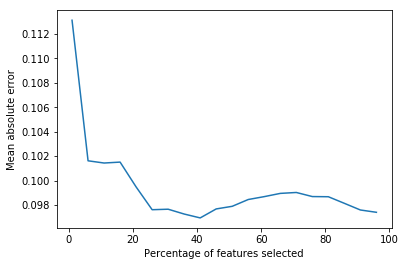

In [72]:
# finding the best percentile:
from sklearn import cross_validation

percentiles = range(1, 100, 5) # experiment with different percentiles
percentiles = np.array(percentiles) # wow, I added this b/c it was not working with just an array
results = []

linreg = LinearRegression()

for i in range(1, 100, 5): # iterates over these values - so with each one of these values do:

    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs = fs.fit_transform(x, y)
    scores = cross_validation.cross_val_score(linreg, X_train_fs, y, cv=5, scoring='mean_absolute_error') # cross-validation for only 5 folds
    # for regression, we would want to return mean absolute error
    # so in the above function, we want to add a parameter 
    # get negative numbers so need to use absolute value
    scores = np.absolute(scores)
    
    print i,scores.mean() # compute the mean for this percentage
    results = np.append(results, scores.mean()) # add this to the results list

optimal_percentile = np.where(results == results.min())[0] 
print "Optimal percentile of features:{0}".format(percentiles[optimal_percentile]), "\n"
optimal_num_features = int(percentiles[optimal_percentile]*len(feature_names)/100)
print "Optimal number of features:{0}".format(optimal_num_features), "\n"

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Mean absolute error")
pl.plot(percentiles,results)

In [73]:
# it looks like the optimal percentage of features is right around 35%

d) Next, perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. First, create a 20%-80% randomized split of the data. Set aside the test portion; the model selection process should be performed using the 80% training data partition. You should create a function that takes as input the data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). You should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally, using the best alpha value, run the model on the set-aside test data. Discuss your observation and conclusions. [Hint: for an example of a similar model selection process please review the class example notebook.]

In [74]:
# I already split the data above at the top of this notebook, so I can use these sets below I think

In [75]:
# Ridge Regression
# using lambda in the slides but scikit learn uses alpha

# Create linear regression object with a ridge coefficient (alpha)0.5
# just like linear - call the Ridge constructor
ridge = Ridge(fit_intercept=True, alpha=0.5)

In [76]:
# Train the model using the training set - using training matrix(x) and target values(y) as before
ridge.fit(x,y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [77]:
# Compute RMSE on training data - similar to linear regression
p = ridge.predict(x) # find predictions based on the entire training data set
err = p-y # error is predicted values minus target actual values
total_error = np.dot(err,err) # sum of squared values is the total error
rmse_train = np.sqrt(total_error/len(p)) # root mean squared error value formula

In [119]:
# Compute RMSE using 10-fold x-validation with ridge regression


n = 10
kf = KFold(len(x), n_folds=n)
xval_err = 0
for train,test in kf:
    ridge.fit(x[train],y[train])
    p = ridge.predict(x[test])
    e = p-y[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x[test]))
rmse_10cv = xval_err/n

method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)


Method: Ridge Regression
RMSE on training: 0.1313
RMSE on 10-fold CV: 0.1360


In [79]:
from sklearn.cross_validation import KFold

# make this a function that takes as input 
# the data and target variable; the parameter to vary and a list of its values; 
# the model to be trained; and any other relevant input needed to determine the optimal value 
# for the specified parameter

# this is the function that measure_performance can be called from within it


def calc_params(x, y, model, param_values, param_name, K): 
    # takes data matrix, test, model that we're evaluating,
    # range of values for parameter - ie. alpha values,
    # parameter name, and K for k-fold cross validation
    
    # Convert input to Numpy arrays - would also work with pandas dataframes 
    X = np.array(x) # training scores
    y = np.array(y) # testing stores

    # initialize training and testing scores with zeros
    # maintaining set of training scores and test scores as np.arrays
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print param_name, ' = ', param_value
        
        # set classifier parameters
        model.set_params(**{param_name:param_value}) 
        # pass a parameter name: parameter value 
        # ** allows for multiple values
        # here we will be looking at different alpha values so 'alpha'= param_value
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(len(x), K, shuffle=True, random_state=0) # set shuffle to true so it's random
        
        # iterate over the K folds
        # call the fit function on the portion of the training data
        for j, (train, test) in enumerate(cv):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding error scores on train and test sets
            model.fit([x[k] for k in train], y[train])
            
            # 1) below, rather than doing model.score, we can call the measure_performance function.
            # so pass x[train], y[train], the linear regression model - in our situation 
            k_train_scores[j] = measure_performance(x[train], y[train], model) # don't need to create
            # a list comprehension here - can just use x[train] - b/c train is already our index for our
            # training instances in x for this particular K in the k fold val.
            # we also compute test instances
            k_test_scores[j] = measure_performance(x[test], y[test], model)
            
        # store the mean of the K fold scores
        # then compute the means
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [80]:
# evenly spaced range of numbers in a specified interval for alpha 
alpha_vals = np.linspace(.01,20,50) 

print alpha_vals

[  1.00000000e-02   4.17959184e-01   8.25918367e-01   1.23387755e+00
   1.64183673e+00   2.04979592e+00   2.45775510e+00   2.86571429e+00
   3.27367347e+00   3.68163265e+00   4.08959184e+00   4.49755102e+00
   4.90551020e+00   5.31346939e+00   5.72142857e+00   6.12938776e+00
   6.53734694e+00   6.94530612e+00   7.35326531e+00   7.76122449e+00
   8.16918367e+00   8.57714286e+00   8.98510204e+00   9.39306122e+00
   9.80102041e+00   1.02089796e+01   1.06169388e+01   1.10248980e+01
   1.14328571e+01   1.18408163e+01   1.22487755e+01   1.26567347e+01
   1.30646939e+01   1.34726531e+01   1.38806122e+01   1.42885714e+01
   1.46965306e+01   1.51044898e+01   1.55124490e+01   1.59204082e+01
   1.63283673e+01   1.67363265e+01   1.71442857e+01   1.75522449e+01
   1.79602041e+01   1.83681633e+01   1.87761224e+01   1.91840816e+01
   1.95920408e+01   2.00000000e+01]


alpha  =  0.01
alpha  =  0.417959183673
alpha  =  0.825918367347
alpha  =  1.23387755102
alpha  =  1.64183673469
alpha  =  2.04979591837
alpha  =  2.45775510204
alpha  =  2.86571428571
alpha  =  3.27367346939
alpha  =  3.68163265306
alpha  =  4.08959183673
alpha  =  4.49755102041
alpha  =  4.90551020408
alpha  =  5.31346938776
alpha  =  5.72142857143
alpha  =  6.1293877551
alpha  =  6.53734693878
alpha  =  6.94530612245
alpha  =  7.35326530612
alpha  =  7.7612244898
alpha  =  8.16918367347
alpha  =  8.57714285714
alpha  =  8.98510204082
alpha  =  9.39306122449
alpha  =  9.80102040816
alpha  =  10.2089795918
alpha  =  10.6169387755
alpha  =  11.0248979592
alpha  =  11.4328571429
alpha  =  11.8408163265
alpha  =  12.2487755102
alpha  =  12.6567346939
alpha  =  13.0646938776
alpha  =  13.4726530612
alpha  =  13.8806122449
alpha  =  14.2885714286
alpha  =  14.6965306122
alpha  =  15.1044897959
alpha  =  15.5124489796
alpha  =  15.9204081633
alpha  =  16.3283673469
alpha  =  16.7363265306
a

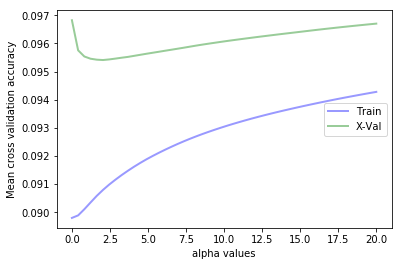

In [81]:
train_scores, test_scores = calc_params(x, y, ridge, alpha_vals, 'alpha', 5)
# calling calc_params to test various alpha vals using our ridge model

For Ridge Regression, there is convergence around 2.5 to maybe 7.5 alpha value, but then there may be leveling off. As values get higher, we may be getting overfitting

In [82]:
# checking our accuracy with val 7.5
ridge.set_params(alpha=7.5)

ridge.fit(x, y)
measure_performance(x_test, y_test, ridge)

0.092893257901221479

In [83]:
# it looks pretty accurate with a low error rate

In [84]:
# Lasso Regression
# Create linear regression object with a ridge coefficient (alpha)0.5
# just like linear - call the Ridge constructor
lasso  = Lasso(fit_intercept=True, alpha=0.5)

In [85]:
# Train the model using the training set 
lasso.fit(x,y)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
# Compute RMSE on training data
p = lasso.predict(x) # find predictions based on the entire training data set
err = p-y # error is predicted values minus target actual values
total_error = np.dot(err,err) # sum of squared values is the total error
rmse_train = np.sqrt(total_error/len(p)) # root mean squared error value formula

In [87]:
# Compute RMSE using 10-fold x-validation with ridge regression

# Compute RMSE using 10-fold x-validation

n = 10
kf = KFold(len(x), n_folds=n)
xval_err = 0
for train,test in kf:
    lasso.fit(x[train],y[train])
    p = lasso.predict(x[test])
    e = p-y[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x[test]))
rmse_10cv = xval_err/n

method_name = 'Lasso Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Lasso Regression
RMSE on training: 0.2297
RMSE on 10-fold CV: 0.2294


In [88]:
# for lasso, I see a higher error rate than ridge for 10-fold CV

alpha  =  0.01
alpha  =  0.417959183673
alpha  =  0.825918367347
alpha  =  1.23387755102
alpha  =  1.64183673469
alpha  =  2.04979591837
alpha  =  2.45775510204
alpha  =  2.86571428571
alpha  =  3.27367346939
alpha  =  3.68163265306
alpha  =  4.08959183673
alpha  =  4.49755102041
alpha  =  4.90551020408
alpha  =  5.31346938776
alpha  =  5.72142857143
alpha  =  6.1293877551
alpha  =  6.53734693878
alpha  =  6.94530612245
alpha  =  7.35326530612
alpha  =  7.7612244898
alpha  =  8.16918367347
alpha  =  8.57714285714
alpha  =  8.98510204082
alpha  =  9.39306122449
alpha  =  9.80102040816
alpha  =  10.2089795918
alpha  =  10.6169387755
alpha  =  11.0248979592
alpha  =  11.4328571429
alpha  =  11.8408163265
alpha  =  12.2487755102
alpha  =  12.6567346939
alpha  =  13.0646938776
alpha  =  13.4726530612
alpha  =  13.8806122449
alpha  =  14.2885714286
alpha  =  14.6965306122
alpha  =  15.1044897959
alpha  =  15.5124489796
alpha  =  15.9204081633
alpha  =  16.3283673469
alpha  =  16.7363265306
a

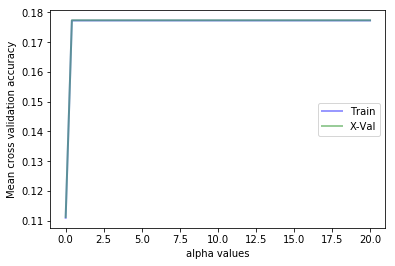

In [89]:
train_scores, test_scores = calc_params(x, y, lasso, alpha_vals, 'alpha', 5)

In [91]:
# not sure what's going on here!  Looks like a mistake from the looks of the graph...
# checking our accuracy with val 2.5
lasso.set_params(alpha=2.5)

lasso.fit(x, y)
measure_performance(x_test, y_test, lasso)

0.18311537941465963

In [92]:
# I'm not sure how to discuss this performance b/c it looks like a bug...

e) Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use the SGDRegessor module from sklearn.linear_model. Again, start by a creating randomized 80%-20% train-test split. SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10). Using the best parameters, apply the model to the set-aside test data. Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a summary of your findings from the above experiments.

In [93]:
# SGD is very senstitive to varying-sized feature values. So, first we need to do feature scaling.
# basically same as others but internally we are doing optimization method - iterative,
# so not trying to get the exact solution
# also b/c doing optimization on individual instances in the data - it is fairly efficient
# but you do have to do a number of iterations b/f you start converging on reasonable values with SGD conversion

from sklearn.preprocessing import StandardScaler
# do this b/c is sensitive to varying sized values 
# this is good practice to standardize the data particularly with sgd

# standardize the data:
scaler = StandardScaler()
scaler.fit(x)
x_s = scaler.transform(x) # standard version of x matrix

sgdreg = SGDRegressor(penalty='l2', alpha=0.1, n_iter=300) # this is how we build the model
# penalty is l2 or l1 = sum of squared errors iteratively updating w values
# can add to function regularization - ridge vs. lasso, can also add elastic net as option
# alpha is 0.1 that professor specified
# professor specified 300 iterations - is a good starting point


# the rest is basically the same:
# Compute RMSE on training data
sgdreg.fit(x_s,y)
p = sgdreg.predict(x_s)
err = p-y
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
kf = KFold(len(x), n_folds=10)
xval_err = 0
for train,test in kf:
    scaler = StandardScaler()
    scaler.fit(x[train])  # Don't cheat - fit only on training data
    xtrain_s = scaler.transform(x[train])
    xtest_s = scaler.transform(x[test])  # apply same transformation to test data
    sgdreg.fit(xtrain_s,y[train])
    p = sgdreg.predict(xtest_s)
    e = p-y[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

Method: Stochastic Gradient Descent Regression
RMSE on training: 0.1313
RMSE on 10-fold CV: 0.1363


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [94]:
# ok I see that SGD has low error rate for both RMSE_training and RMSE 10-fold CV, 
# however the 10-fold CV is slightly higher

In [95]:
# Grid Search comparing l1 and l2, as well as different values of alpha

In [114]:
# evenly spaced range of numbers in a specified interval for alpha
alpha_vals = np.linspace(.0001,10,50) 

print alpha_vals

[  1.00000000e-04   2.04179592e-01   4.08259184e-01   6.12338776e-01
   8.16418367e-01   1.02049796e+00   1.22457755e+00   1.42865714e+00
   1.63273673e+00   1.83681633e+00   2.04089592e+00   2.24497551e+00
   2.44905510e+00   2.65313469e+00   2.85721429e+00   3.06129388e+00
   3.26537347e+00   3.46945306e+00   3.67353265e+00   3.87761224e+00
   4.08169184e+00   4.28577143e+00   4.48985102e+00   4.69393061e+00
   4.89801020e+00   5.10208980e+00   5.30616939e+00   5.51024898e+00
   5.71432857e+00   5.91840816e+00   6.12248776e+00   6.32656735e+00
   6.53064694e+00   6.73472653e+00   6.93880612e+00   7.14288571e+00
   7.34696531e+00   7.55104490e+00   7.75512449e+00   7.95920408e+00
   8.16328367e+00   8.36736327e+00   8.57144286e+00   8.77552245e+00
   8.97960204e+00   9.18368163e+00   9.38776122e+00   9.59184082e+00
   9.79592041e+00   1.00000000e+01]


In [97]:
# looking at the parameters for sdg - we will be looking at 'penalty' l1 or l2
# and different values of 'alpha'

print sgdreg.get_params()

{'warm_start': False, 'loss': 'squared_loss', 'eta0': 0.01, 'verbose': 0, 'shuffle': True, 'fit_intercept': True, 'l1_ratio': 0.15, 'average': False, 'max_iter': None, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'tol': None, 'epsilon': 0.1, 'n_iter': 300, 'alpha': 0.1, 'learning_rate': 'invscaling'}


In [101]:
# using GridSearchCV to find ideal parameters
from sklearn.grid_search import GridSearchCV

parameters = {
    'alpha': alpha_vals,
    'penalty': ['l2']
}

gs = GridSearchCV(sgdreg, parameters, verbose=1, cv=5)

In [102]:
# checking for best parameters and best score
# we're using sgdreg on our standardized x: x_s

%time _ = gs.fit(x_s, y)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

CPU times: user 28.6 s, sys: 275 ms, total: 28.9 s
Wall time: 28.7 s


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   28.6s finished
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


({'alpha': 0.0001, 'penalty': 'l2'}, 0.6423797495760898)

In [103]:
# checking 'l1'
from sklearn.grid_search import GridSearchCV

parameters = {
    'alpha': alpha_vals,
    'penalty': ['l1']
}

gs = GridSearchCV(sgdreg, parameters, verbose=1, cv=5)

In [104]:
%time _ = gs.fit(x_s, y)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

CPU times: user 1min 19s, sys: 501 ms, total: 1min 19s
Wall time: 1min 19s


({'alpha': 0.0001, 'penalty': 'l1'}, 0.6383917910085288)

In [105]:
# it appears from both tests above that alpha = 0.0001 is the best alpha value, and 'l1' give us a higher accuracy 
# score

In [ ]:
# Using the best parameters, apply the model to the set-aside test data. 

In [113]:
# applying the params to the set aside test data
# alpha = 0.0001
sgdreg.set_params(alpha=0.0001,penalty='l1')

sgdreg.fit(x_s, y)
measure_performance(x_test, y_test, sgdreg)

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.14313113979681874

In [107]:
# still very low error rate using sgdreg with these parameters, compared with our other models above

In [108]:
# Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" 
# parameter using SGDRegressor with the "elasticnet" penalty parameter. 
# [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1; 
# l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] 
# Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. 
# Provide a summary of your findings from the above experiments.

In [121]:
# create list for l1_ratio parameter:
l1_ratio_vals = np.linspace(0,1,25) 

l1_ratio  =  0.0


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

l1_ratio  =  0.0416666666667


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


l1_ratio  =  0.0833333333333


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

l1_ratio  =  0.125


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


l1_ratio  =  0.166666666667


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

l1_ratio  =  0.208333333333


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


l1_ratio  =  0.25


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

l1_ratio  =  0.291666666667


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


l1_ratio  =  0.333333333333


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

l1_ratio  =  0.375


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


l1_ratio  =  0.416666666667


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

l1_ratio  =  0.458333333333


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


l1_ratio  =  0.5


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

l1_ratio  =  0.541666666667


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

l1_ratio  =  0.583333333333


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


l1_ratio  =  0.625


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

l1_ratio  =  0.666666666667


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

l1_ratio  =  0.708333333333


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

l1_ratio  =  0.75


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


l1_ratio  =  0.791666666667


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

l1_ratio  =  0.833333333333


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


l1_ratio  =  0.875


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

l1_ratio  =  0.916666666667


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

l1_ratio  =  0.958333333333


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

l1_ratio  =  1.0


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Applications/anaconda2/lib/python2.

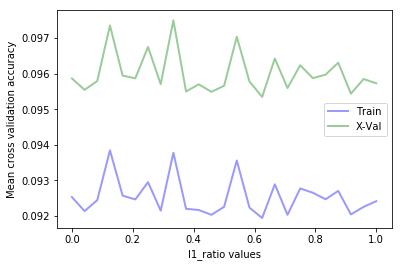

In [122]:
train_scores, test_scores = calc_params(x, y, sgdreg, l1_ratio_vals, 'l1_ratio', 5)

In [123]:
# hmmmm, another strange looking visualization!  I'll just guess a value, so I'll choose 0.8 as the parameter
# because they seem to converge slightly

In [125]:
# applying the params to the set aside test data
# with l1_ration
elastic_net = ElasticNet(fit_intercept=True)

print elastic_net.get_params()

{'normalize': False, 'warm_start': False, 'selection': 'cyclic', 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000, 'precompute': False, 'random_state': None, 'tol': 0.0001, 'positive': False, 'copy_X': True, 'alpha': 1.0}


In [132]:
elastic_net.set_params(l1_ratio=0.8)

elastic_net.fit(x, y)
measure_performance(x_test, y_test, elastic_net)

0.18311537941465963

In [133]:
# I see that the elastic_net model gives us a higher error value than SDG, and the same value for lasso
# whereas our ridge value had a much lower error rate at ~0.09, as did linreg.

#### 2) Automatic Document Clustering [Dataset: newsgroups5.zip]


For this problem you will use a different subset of the 20 Newsgroup data set that you used in Assignment 2  (see the description of the full dataset). The subset for this assignment includes 2,500 documents (newsgroup posts), each belonging to one of 5 categories windows (0), crypt (1), christian (2), hockey (3), forsale (4). The documents are represented by 9328 terms (stems). The dictionary (vocabulary) for the data set is given in the file "terms.txt" and the full term-by-document matrix is given in "matrix.txt" (comma separated values). The actual category labels for the documents are provided in the file "classes.txt". Your goal in this assignment is to perform clustering on the documents and compare the clusters to the actual categories.

Your tasks in this problem are the following [Note: for the clustering part of this assignment you should use the kMeans module form Ch. 10 of MLA (use the version provided here as it includes some corrections to the book version). You may also use Pandas and other modules from scikit-learn that you may need for preprocessing or evaluation.]

In [ ]:
import numpy as np
import pylab as pl
import pandas as pd
from sklearn.cluster import KMeans 

a) Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function.

In [140]:
# here is the book's implementation of Euclidean distance
# def distEuclid(vecA, vecB):
#     return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

# we need to create Cosine similarity function to use as our similarity metric that takes in two vectors 
def distCosine(vecA, vecB):
    # using cosine similarity to compare two vectors
    # first compute norm of each one of the rows
    A_norm = np.linalg.norm(vecA)
    B_norm = np.linalg.norm(vecB)
    # then we divide the dot product of our two vectors by the norms of each vector multiplied:
    sim = np.dot(vecA,vecB)/(A_norm * B_norm)
    # this total calculation gives us cosine similarity between our two vectors
    # so we now need to subtract our value from 1 to find the distance needed for our kmeans function
    # inverse of the similarity
    distance = 1 - sim
    return distance

# now I'll add this to the kmeans.py file so it can be called in our clustering function below

b) Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.

In [224]:
# read in the data 
data = pd.read_csv("newsgroups5/matrix.txt", header=None, sep=',', na_values=["?", " "])


In [225]:
data.shape # term X document dataframe

(9328, 2500)

In [226]:
# see if any nan values
nans_rows = data[data.isnull().any(axis=1)]

In [227]:
nans_rows

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499


In [228]:
# doesn't look like there are any null or nan values

In [229]:
# Because our kNN classifier uses numpy array or matrix as input, we need to transform DataFrames into np arrays
# and we need to transpose so that they are document/text matrixes

# training data into np.array
data = np.array(data).T

In [230]:
data.shape # we now have a document X term 2D np.array

(2500, 9328)

In [231]:
data[:10, :10]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [451]:
target = np.loadtxt('newsgroups5/classes.txt', delimiter=' ', skiprows=1, usecols=1)

In [452]:
# ok now we need to split the data into training and test sets
from sklearn.cross_validation import train_test_split
x_train, x_test, target, target_test = train_test_split(data,target, test_size=0.2, random_state=33)

In [453]:
x_train.shape

(2000, 9328)

In [454]:
x_test.shape

(500, 9328)

c) Perform Kmeans clustering on the training data. Write a function to display the top N terms in each cluster along with the cluster DF values for each term and the size of the cluster. The cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears (so, if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, then DF value of "game" in that cluster is 0.2 or 20%). Sort the terms for each cluster in decreasing order of the DF percentage. Here is an example of how this output might look like (here the top 10 terms for 3 of the 5 clusters are displayed in decreasing order of cluster DF values, but the mean frequnecy from the cluster centroid is also shown). [Extra Credit: use your favorite third party tool, ideally with a Python based API, to create a word cloud for each cluster.]

In [455]:
# terms are the columns indexes, I'm assuming in order so I'll read in the terms here

terms = np.genfromtxt('newsgroups5/terms.txt',dtype='str')

In [456]:
type(terms)

numpy.ndarray

In [457]:
terms.shape

(9328,)

In [458]:
# now perform kmeans clustering on the training data:
# import the kmeans alg 

import kMeans

In [459]:
reload(kMeans)

<module 'kMeans' from 'kMeans.pyc'>

In [460]:
centroids, clusters = kMeans.kMeans(x_train, 5, kMeans.distCosine, kMeans.randCent) 

In [461]:
centroids 
# these values show us the mean frequency of raw counts in the documents
# these are our 5 centroids with the mean value for each term

array([[  2.85714286e-01,   0.00000000e+00,   0.00000000e+00, ...,
          2.85714286e-01,   1.42857143e-01,   8.57142857e-01],
       [  8.08843989e-01,   2.39244214e-01,   4.40107761e+01, ...,
          1.14424574e+00,   6.66995939e-01,   3.62800448e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.66666667e-01,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   9.92555831e-03,   2.48138958e-03, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.15656566e-03,   0.00000000e+00,   4.54545455e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [462]:
centroids.shape # so this is 5 by 9328 2D np.array

(5, 9328)

In [463]:
clusters # see notes below describing these numbers

array([[ 4.        ,  0.80087285],
       [ 4.        ,  0.75962926],
       [ 4.        ,  0.72569189],
       ..., 
       [ 4.        ,  0.34664739],
       [ 4.        ,  0.50722438],
       [ 4.        ,  0.56491376]])

In [464]:
clusters.shape 
# we see that each row is referring to a document so we now have each document and its cluster assignment(first value)
# second value is average distance to the center of the cluster
# usually don't do anything with second column
# just the first column is used to see cluster assignments

(2000, 2)

In [467]:
# looking at the centroids just for first 10 terms
print "\t\tCluster0\tCluster1\tCluster2\tCluster3\tCluster4"
for i in range(10):
    print "%10s\t%.4f\t\t%.4f\t\t%.4f\t\t%.4f\t\t%.4f" %(terms[i],centroids[0][i],centroids[1][i],
                                                         centroids[2][i],centroids[3][i],centroids[4][i])

# This table shows us the mean frequency of raw counts of the specific term in the documents
# for that cluster
# seems to be capturing the patterns in the data
# (if I have time I will look into word clouds)
# for example, we see that aa appears on average 0.2857 times in cluster 0

		Cluster0	Cluster1	Cluster2	Cluster3	Cluster4
        aa	0.2857		0.8088		0.0000		0.0000		0.0032
     aargh	0.0000		0.2392		0.0000		0.0099		0.0000
     aaron	0.0000		44.0108		0.0000		0.0025		0.0455
    aaronc	0.0000		0.0773		0.0000		0.0000		0.0051
        ab	1.5714		2.0303		0.1667		0.0000		0.0038
   abandon	0.0000		0.7777		0.0000		0.0050		0.0051
       abc	0.0000		0.8700		0.0000		0.0993		0.0025
      abid	0.0000		0.2414		0.0000		0.0000		0.0013
      abil	0.1429		4.3413		0.0000		0.0199		0.0316
       abl	0.0000		3.7349		0.0000		0.0819		0.0922


In [468]:
# now write a function to display the top N terms in each cluster along with the  
# cluster DF values for each term and the size of the cluster.
# The cluster DF value for a term t in a cluster C is the percentage of docs in cluster C 
# in which term t appears (so, if a cluster has 500 documents, and term "game" appears in 100 
# of those 500 documents, then DF value of "game" in that cluster is 0.2 or 20%). 
# Sort the terms for each cluster in decreasing order of the DF percentage.

In [469]:
# this will allow me to get the number of docs in each cluster:
newC = clusters.T
newC = newC[0, :]
newC.shape

(2000,)

In [470]:
print newC

[ 4.  4.  4. ...,  4.  4.  4.]


In [471]:
# I may need the total number of documents and total number of rows for my function:
total_terms = len(x_train[0])
total_docs = len(x_train)

In [472]:
print total_docs
print total_terms

2000
9328


In [473]:
# I have the mean frequency of the raw counts of the specific terms in the documents
# and I have the cluster assignments for each document so I can create this function
# finding the document frequency
def displayClusters():
    for i in range(5):
        print "Cluster {} results:".format(i)
        cluster_indx = [ind for ind,x in enumerate(newC[0,:]) if x==i]
        num_docs = len(cluster_indx)
        print "Number of documents in cluster:  {}".format(num_docs) 
        # here I need to figure out how to find the DF for each term...
        # having a hard time figuring how to create my cluster lists
#         arr = np.empty([0, total_terms])
#         for ind, row in enumerate(x_train):
#             for clust_ind in cluster_indx:
#                 if ind==clust_ind:
# #                     print clust_ind,row
#                     arr = np.append(arr, [row], axis=0)
        
    
#         print df
    # now I can find the doc frequency

#         DF = np.array([(arr!=0).sum(0)]).T
        
#         df = DF/num_docs # not giving me accurate percentages        
# got stuck here and I'm out of time so I'm moving forward and will come back to this...
# maybe I'm overcomplicating this
    
        

In [474]:
displayClusters()

Cluster 0 results:


IndexError: too many indices for array

d) Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the 5 pre-assigned classes by computing the Completeness and Homogeneity values.

In [475]:
from sklearn.metrics import completeness_score, homogeneity_score

In [476]:
print completeness_score(target,newC) 
# that means all members of a given class are assigned to the same cluster
# ideally these both should be high values
# pass original target values, and our clustering values

0.761159274968


In [477]:
print homogeneity_score(target,newC) 
# means each clusters contain only members of a single class
# often there is a tradeoff between these values

0.257640697217


In [478]:
# oops, very low, maybe made a mistake somewhere...

e) Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate cluster. Your categorization should be based on Cosine similarity between each test document and cluster centroids. For each test document show the predicted class label as well as Cosine similarity to the corresponding cluster.

In [483]:
# now create the classification algorithm
# using Rocchio as an outline
def categoryClass(x, cents):
    """ compare cosine-similarity for instance x between the prototypes """
    # first find the vector norm for each instance in prototypes as well as the norm for vector x
    D_norm = np.array([np.linalg.norm(cents[i]) for i in range(len(cents))])
    x_norm = np.linalg.norm(x)
    # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
    sims = np.dot(cents,x)/(D_norm * x_norm)
    # The distance measure will be the inverse of Cosine similarity
    dists = 1 - sims
    
    # this gives us the index of the most similar centroids
    idx = np.argsort(dists) # sorting
        
    return idx[0], dists

In [484]:
# revamping accuracy function from above
def categoryAccuracy(testData, testLabels, cents):
    # first get the length of the data we are testing for accuracy
    numTestVecs = len(testData)
    # initialize the error count to 0.0
    errorCount = 0.0
    # not test for accuracy for each vector in the test set using the known labels
    for i in range(numTestVecs):
        # call categoryClass for each vector in test data
        prediction, distances = categoryClass(testData[i], cents)
        # compare the predicted label with our known label
        # if they are not equal then we add 1 to our error count
        if (prediction != testLabels[i]): errorCount += 1.0
    # the formula for error rate is the total error count divided by the number of 
    # our total test vectors or the length of the testData
    errorRate = errorCount/float(numTestVecs)
    print "the total error rate is: %f" % (errorRate)
    return errorRate

In [486]:
categoryAccuracy(x_test, target_test, centroids)

the total error rate is: 0.624000


0.624

In [487]:
# well, it looks like my accuracy is not very good at all.  I will have to look over all of my work and see
# where I went wrong.  I remember our professor saying that we need to recluster at some point.  I'm not sure
# where that would need to be done.  For now I am turning in my assignment but I will continue to look into what went
# wrong.